# Sentiment Analysis in Keras ANN Implementations

In [1]:
# Import necessary packages.
import string
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing.text import Tokenizer
from keras.utils.vis_utils import plot_model
from keras.callbacks import EarlyStopping
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.svm import SVC
from sklearn.tree import ExtraTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from PreProcessing import clean_doc, Cleaned_X_Y
from model import define_model

In [2]:
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [3]:
filename = "Roman Urdu DataSet.csv"

In [4]:
X, y = Cleaned_X_Y(filename)

In [5]:
# Count Vectorizer
cv = TfidfVectorizer(max_features=1500)
X = cv.fit_transform(X).toarray()
print("Shape of the Features X :", X.shape)

Shape of the Features X : (20227, 1500)


In [6]:
Y = pd.get_dummies(y).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (20227, 3)


In [7]:
# Train Test Split (0.8, 0.2)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20)

In [8]:
n_words = X_train.shape[1]
# Create Model
model = define_model(n_words)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                45030     
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 30)                0         
_________________________________________________________________
dropout (Dropout)            (None, 30)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                310       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 10)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 3

In [9]:
epochs = 150
batch_size = 64

history_v = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss', patience=10, min_delta=0.0001)])

Epoch 1/150
203/203 [==============================] - 1s 4ms/step - loss: 1.1546 - accuracy: 0.4377 - val_loss: 1.1468 - val_accuracy: 0.4424
Epoch 2/150
203/203 [==============================] - 1s 3ms/step - loss: 1.1483 - accuracy: 0.4439 - val_loss: 1.1441 - val_accuracy: 0.4424
Epoch 3/150
203/203 [==============================] - 1s 3ms/step - loss: 1.1439 - accuracy: 0.4439 - val_loss: 1.1423 - val_accuracy: 0.4424
Epoch 4/150
203/203 [==============================] - 1s 3ms/step - loss: 1.1422 - accuracy: 0.4439 - val_loss: 1.1407 - val_accuracy: 0.4424
Epoch 5/150
203/203 [==============================] - 1s 3ms/step - loss: 1.1404 - accuracy: 0.4439 - val_loss: 1.1394 - val_accuracy: 0.4424
Epoch 6/150
203/203 [==============================] - 1s 3ms/step - loss: 1.1388 - accuracy: 0.4439 - val_loss: 1.1380 - val_accuracy: 0.4424
Epoch 7/150
203/203 [==============================] - 1s 3ms/step - loss: 1.1381 - accuracy: 0.4439 - val_loss: 1.1366 - val_accuracy: 0.4424

Epoch 58/150
203/203 [==============================] - 1s 3ms/step - loss: 1.0144 - accuracy: 0.5493 - val_loss: 1.0107 - val_accuracy: 0.5524
Epoch 59/150
203/203 [==============================] - 1s 3ms/step - loss: 1.0125 - accuracy: 0.5513 - val_loss: 1.0069 - val_accuracy: 0.5468
Epoch 60/150
203/203 [==============================] - 1s 3ms/step - loss: 1.0069 - accuracy: 0.5540 - val_loss: 1.0055 - val_accuracy: 0.5589
Epoch 61/150
203/203 [==============================] - 1s 3ms/step - loss: 1.0024 - accuracy: 0.5567 - val_loss: 1.0040 - val_accuracy: 0.5616
Epoch 62/150
203/203 [==============================] - 1s 3ms/step - loss: 1.0032 - accuracy: 0.5627 - val_loss: 1.0020 - val_accuracy: 0.5656
Epoch 63/150
203/203 [==============================] - 1s 3ms/step - loss: 0.9998 - accuracy: 0.5632 - val_loss: 1.0005 - val_accuracy: 0.5684
Epoch 64/150
203/203 [==============================] - 1s 3ms/step - loss: 0.9942 - accuracy: 0.5579 - val_loss: 0.9964 - val_accuracy:

Epoch 115/150
203/203 [==============================] - 1s 3ms/step - loss: 0.8965 - accuracy: 0.6452 - val_loss: 0.9305 - val_accuracy: 0.6098
Epoch 116/150
203/203 [==============================] - 1s 3ms/step - loss: 0.9057 - accuracy: 0.6419 - val_loss: 0.9293 - val_accuracy: 0.6216
Epoch 117/150
203/203 [==============================] - 1s 3ms/step - loss: 0.8980 - accuracy: 0.6399 - val_loss: 0.9294 - val_accuracy: 0.6166
Epoch 118/150
203/203 [==============================] - 1s 3ms/step - loss: 0.8935 - accuracy: 0.6415 - val_loss: 0.9304 - val_accuracy: 0.6027
Epoch 119/150
203/203 [==============================] - 1s 3ms/step - loss: 0.8992 - accuracy: 0.6438 - val_loss: 0.9250 - val_accuracy: 0.6169
Epoch 120/150
203/203 [==============================] - 1s 3ms/step - loss: 0.8929 - accuracy: 0.6445 - val_loss: 0.9230 - val_accuracy: 0.6209
Epoch 121/150
203/203 [==============================] - 1s 3ms/step - loss: 0.8945 - accuracy: 0.6418 - val_loss: 0.9233 - val_ac

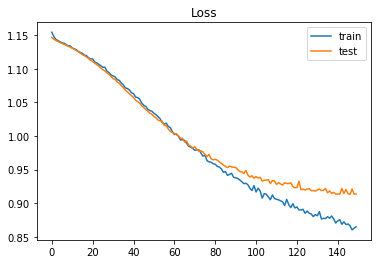

In [11]:
# Training vs Validation Loss Function
plt.title('Loss')
plt.plot(history_v.history['loss'], label='train')
plt.plot(history_v.history['val_loss'], label='test')
plt.legend()
plt.show();

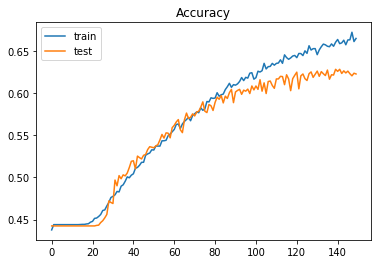

In [12]:
# Training vs Validation Accuracy
plt.title('Accuracy')
plt.plot(history_v.history['accuracy'], label='train')
plt.plot(history_v.history['val_accuracy'], label='test')
plt.legend()
plt.show();